In [128]:
!pip install deepchem
import deepchem as dc
dc.__version__

'2.7.1'

In [129]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
import numpy as np

from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem, DataStructs
from rdkit.Chem import (
    PandasTools,
    Draw,
    Descriptors,
    MACCSkeys,
    rdFingerprintGenerator,
)

In [130]:
from google.colab import files
uploaded = files.upload()

Saving BBBP.csv to BBBP (6).csv


In [131]:
df_bbbp = pd.read_csv('BBBP.csv')
df_bbbp

,num,name,p_np,smiles
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...
...,...,...,...,...
2045,2049,licostinel,1,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl
2046,2050,ademetionine(adenosyl-methionine),1,[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...
2047,2051,mesocarb,1,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...
2048,2052,tofisoline,1,C1=C(OC)C(=CC2=C1C(=[N+](C(=C2CC)C)[NH-])C3=CC...


[12:52:40] Explicit valence for atom # 1 N, 4, is greater than permitted
[12:52:40] WARNING: not removing hydrogen atom without neighbors
[12:52:40] Explicit valence for atom # 6 N, 4, is greater than permitted
[12:52:40] WARNING: not removing hydrogen atom without neighbors
[12:52:40] WARNING: not removing hydrogen atom without neighbors
[12:52:40] WARNING: not removing hydrogen atom without neighbors
[12:52:40] WARNING: not removing hydrogen atom without neighbors
[12:52:40] WARNING: not removing hydrogen atom without neighbors
[12:52:40] WARNING: not removing hydrogen atom without neighbors
[12:52:40] Explicit valence for atom # 6 N, 4, is greater than permitted
[12:52:40] WARNING: not removing hydrogen atom without neighbors
[12:52:40] WARNING: not removing hydrogen atom without neighbors
[12:52:40] WARNING: not removing hydrogen atom without neighbors
[12:52:40] WARNING: not removing hydrogen atom without neighbors
[12:52:40] Explicit valence for atom # 11 N, 4, is greater than pe

,num,name,p_np,smiles,ROMol
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12,
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl,
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...,
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C,
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...,
...,...,...,...,...,...
2045,2049,licostinel,1,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl,
2046,2050,ademetionine(adenosyl-methionine),1,[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...,
2047,2051,mesocarb,1,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...,
2048,2052,tofisoline,1,C1=C(OC)C(=CC2=C1C(=[N+](C(=C2CC)C)[NH-])C3=CC...,

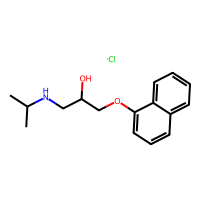
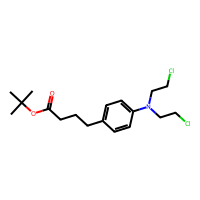
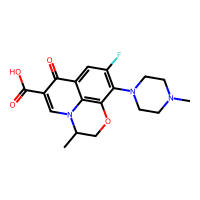
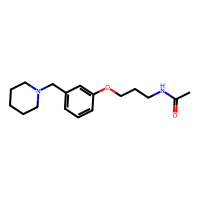
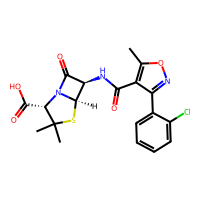
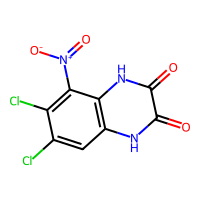
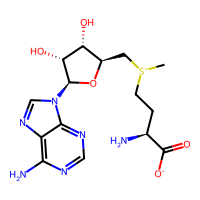
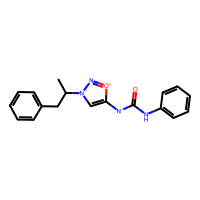
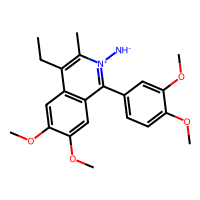
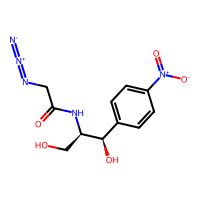

In [132]:
PandasTools.AddMoleculeColumnToFrame(df_bbbp,'smiles','ROMol')
df_bbbp

,num,name,p_np,smiles,ROMol
0,0,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12,
1,1,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl,
2,2,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...,
3,3,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C,
4,4,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...,
...,...,...,...,...,...
2045,2045,licostinel,1,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl,
2046,2046,ademetionine(adenosyl-methionine),1,[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...,
2047,2047,mesocarb,1,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...,
2048,2048,tofisoline,1,C1=C(OC)C(=CC2=C1C(=[N+](C(=C2CC)C)[NH-])C3=CC...,

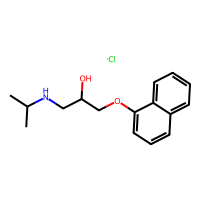
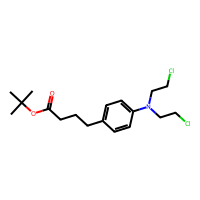
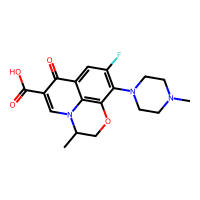
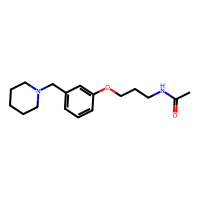
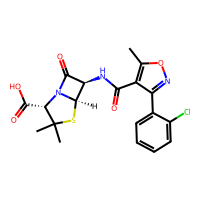
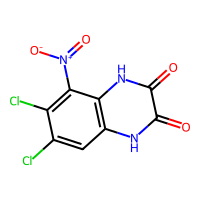
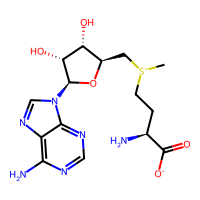
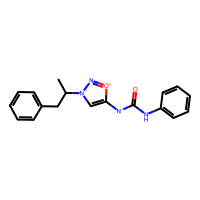
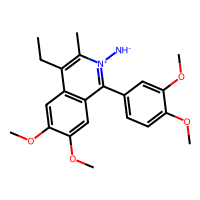
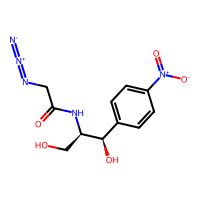

In [133]:
list = []
for i in range(df_bbbp.shape[0]):
  list.append(i)
df_bbbp['num'] = list
df_bbbp

In [134]:
df_removed = pd.DataFrame()
df_removed

""


In [135]:
df_bbbp.loc[df_bbbp.p_np.isnull()]

,num,name,p_np,smiles,ROMol


In [141]:
df_bbbp.loc[df_bbbp.ROMol.isnull()]

,num,name,p_np,smiles,ROMol
59,59,15,1,O=N([O-])C1=C(CN=C1NCCSCc2ncccc2)Cc3ccccc3,None
61,61,22767,1,c1(nc(NC(N)=[NH2])sc1)CSCCNC(=[NH]C#N)NC,None
391,391,ICI17148,1,Cc1nc(sc1)\[NH]=C(\N)N,None
614,614,5-6,1,s1cc(CSCCN\C(NC)=[NH]\C#N)nc1\[NH]=C(\N)N,None
642,642,12,0,c1c(c(ncc1)CSCCN\C(=[NH]\C#N)NCC)Br,None
645,645,16,1,n1c(csc1\[NH]=C(\N)N)c1ccccc1,None
646,646,17,0,n1c(csc1\[NH]=C(\N)N)c1cccc(c1)N,None
647,647,18,0,n1c(csc1\[NH]=C(\N)N)c1cccc(c1)NC(C)=O,None
648,648,19,0,n1c(csc1\[NH]=C(\N)N)c1cccc(c1)N\C(NC)=[NH]\C#N,None
649,649,2,1,s1cc(nc1\[NH]=C(\N)N)C,None


In [146]:
df_removed = df_bbbp.loc[df_bbbp.ROMol.isnull()]
df_removed.drop(columns = 'ROMol',inplace=True)
df_removed

<ipython-input-146-48c42b7b68c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_removed.drop(columns = 'ROMol',inplace=True)


,num,name,p_np,smiles
59,59,15,1,O=N([O-])C1=C(CN=C1NCCSCc2ncccc2)Cc3ccccc3
61,61,22767,1,c1(nc(NC(N)=[NH2])sc1)CSCCNC(=[NH]C#N)NC
391,391,ICI17148,1,Cc1nc(sc1)\[NH]=C(\N)N
614,614,5-6,1,s1cc(CSCCN\C(NC)=[NH]\C#N)nc1\[NH]=C(\N)N
642,642,12,0,c1c(c(ncc1)CSCCN\C(=[NH]\C#N)NCC)Br
645,645,16,1,n1c(csc1\[NH]=C(\N)N)c1ccccc1
646,646,17,0,n1c(csc1\[NH]=C(\N)N)c1cccc(c1)N
647,647,18,0,n1c(csc1\[NH]=C(\N)N)c1cccc(c1)NC(C)=O
648,648,19,0,n1c(csc1\[NH]=C(\N)N)c1cccc(c1)N\C(NC)=[NH]\C#N
649,649,2,1,s1cc(nc1\[NH]=C(\N)N)C


,num,name,p_np,smiles,ROMol
0,0,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12,
1,1,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl,
2,2,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...,
3,3,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C,
4,4,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...,
...,...,...,...,...,...
2045,2045,licostinel,1,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl,
2046,2046,ademetionine(adenosyl-methionine),1,[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...,
2047,2047,mesocarb,1,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...,
2048,2048,tofisoline,1,C1=C(OC)C(=CC2=C1C(=[N+](C(=C2CC)C)[NH-])C3=CC...,

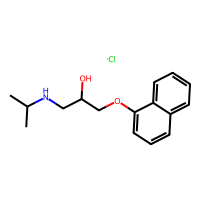
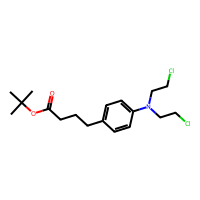
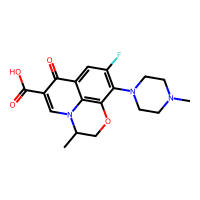
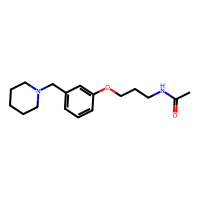
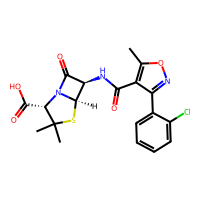
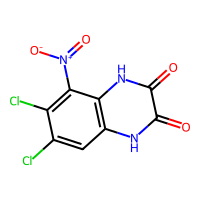
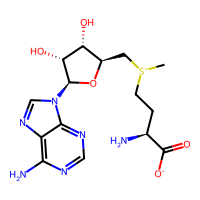
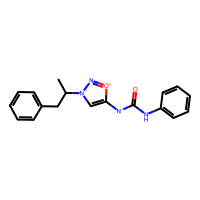
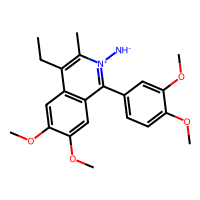
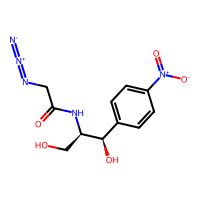

In [147]:
#Deleting the compounds that does not have ROMol Structures
df_bbbp.drop(df_bbbp.loc[df_bbbp.ROMol.isnull()].index,inplace=True)
df_bbbp

In [148]:
#Add Morgan fingerprints (as bit vector) for all molecules to the DataFrame.
df_bbbp["morgan"] = rdFingerprintGenerator.GetFPs(df_bbbp["ROMol"].tolist())

In [149]:
df_bbbp.shape[0]

2039

,index,num,name,p_np,smiles,ROMol,morgan
0,0,0,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,1,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,2,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
3,3,3,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C,,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
4,4,4,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...,,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...
2034,2045,2034,licostinel,1,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2035,2046,2035,ademetionine(adenosyl-methionine),1,[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2036,2047,2036,mesocarb,1,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2037,2048,2037,tofisoline,1,C1=C(OC)C(=CC2=C1C(=[N+](C(=C2CC)C)[NH-])C3=CC...,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."

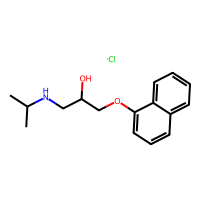
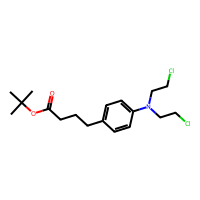
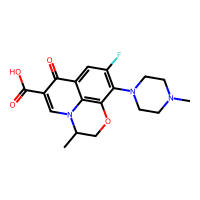
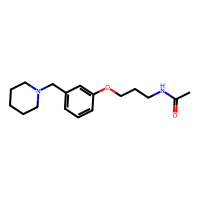
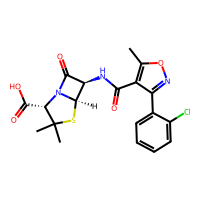
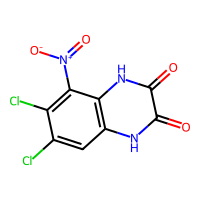
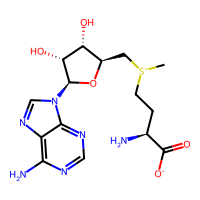
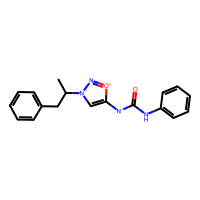
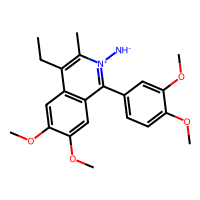
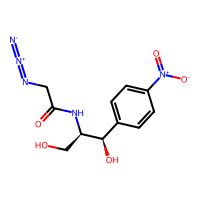

In [150]:
list = []
for i in range(df_bbbp.shape[0]):
  list.append(i)
df_bbbp['num'] = list
df_bbbp.reset_index(inplace=True)
df_bbbp

In [151]:
#Searching for duplicated molecules (printing twice for triplicates)
mol_list = []
for smiles in df_bbbp.smiles:
  mol = Chem.MolFromSmiles(smiles)
  mol_list.append(mol)

l_check = []
bi = {}
for x in range(df_bbbp.shape[0] - 2):
  fp = AllChem.GetMorganFingerprintAsBitVect(mol_list[x], 2, nBits = 1024, bitInfo = bi)
  for y in range(df_bbbp.shape[0] - 3):
    fp2 = AllChem.GetMorganFingerprintAsBitVect(mol_list[y+1], 2, nBits = 1024, bitInfo = bi)
    tanimoto= DataStructs.TanimotoSimilarity(fp,fp2)
    if tanimoto == 1:
      if x < y:
        l_check.append([df_bbbp.index[x],df_bbbp.index[y+1],df_bbbp.name[x],df_bbbp.name[y+1],df_bbbp.p_np[x],df_bbbp.p_np[y+1],df_bbbp.num[x],df_bbbp.num[y+1]])
        print([df_bbbp.index[x],df_bbbp.index[y+1],'   name: ', df_bbbp.name[x],df_bbbp.name[y+1], 'p_np: ', df_bbbp.p_np[x],df_bbbp.p_np[y+1], 'num: ',df_bbbp.num[x],df_bbbp.num[y+1]])

[12:59:09] WARNING: not removing hydrogen atom without neighbors
[12:59:09] WARNING: not removing hydrogen atom without neighbors
[12:59:09] WARNING: not removing hydrogen atom without neighbors
[12:59:09] WARNING: not removing hydrogen atom without neighbors
[12:59:09] WARNING: not removing hydrogen atom without neighbors
[12:59:09] WARNING: not removing hydrogen atom without neighbors
[12:59:09] WARNING: not removing hydrogen atom without neighbors
[12:59:09] WARNING: not removing hydrogen atom without neighbors
[12:59:09] WARNING: not removing hydrogen atom without neighbors
[12:59:09] WARNING: not removing hydrogen atom without neighbors
[12:59:09] WARNING: not removing hydrogen atom without neighbors
[12:59:09] WARNING: not removing hydrogen atom without neighbors
[12:59:09] WARNING: not removing hydrogen atom without neighbors
[12:59:09] WARNING: not removing hydrogen atom without neighbors
[12:59:09] WARNING: not removing hydrogen atom without neighbors
[12:59:09] WARNING: not r

[1, 588, '   name: ', 'Terbutylchlorambucil', 'Tertbutylchlorambucil', 'p_np: ', 1, 1, 'num: ', 1, 588]
[2, 31, '   name: ', '40730', 'Levofloxacin', 'p_np: ', 1, 1, 'num: ', 2, 31]
[2, 410, '   name: ', '40730', 'Ofloxacin', 'p_np: ', 1, 1, 'num: ', 2, 410]
[3, 655, '   name: ', '24', '24', 'p_np: ', 1, 1, 'num: ', 3, 655]
[10, 264, '   name: ', 'M2L-663581', '35', 'p_np: ', 0, 0, 'num: ', 10, 264]
[12, 430, '   name: ', '18', 'Dichloromethane', 'p_np: ', 1, 1, 'num: ', 12, 430]
[13, 313, '   name: ', '24959', 'Saquinavir', 'p_np: ', 1, 0, 'num: ', 13, 313]
[14, 1891, '   name: ', 'methadone', 'methadone(levomethadone)', 'p_np: ', 1, 1, 'num: ', 14, 1891]
[16, 547, '   name: ', 'BRL53080', 'loperamide', 'p_np: ', 1, 0, 'num: ', 16, 547]
[17, 124, '   name: ', 'hyoscyamine', 'atropine', 'p_np: ', 1, 0, 'num: ', 17, 124]
[17, 1686, '   name: ', 'hyoscyamine', 'atropine(hyoscyamine)', 'p_np: ', 1, 1, 'num: ', 17, 1686]
[21, 450, '   name: ', 'Dexamfetamine', 'amphetamine', 'p_np: ', 1, 1

In [152]:
#Duplicated molecules with extra line generated by triplicates
dfDUP = pd.DataFrame()
dfDUP['dup'] = l_check
dfDUP

,dup
0,"[1, 588, Terbutylchlorambucil, Tertbutylchlora..."
1,"[2, 31, 40730, Levofloxacin, 1, 1, 2, 31]"
2,"[2, 410, 40730, Ofloxacin, 1, 1, 2, 410]"
3,"[3, 655, 24, 24, 1, 1, 3, 655]"
4,"[10, 264, M2L-663581, 35, 0, 0, 10, 264]"
...,...
89,"[678, 953, Aciclovir, acyclovir/aciclovir, 1, ..."
90,"[687, 1867, methotrimeprazine, levomepromazine..."
91,"[971, 1697, alphamethadol, betamethadol, 1, 1,..."
92,"[1235, 1828, fluocortin, fluocortin-butyl, 1, ..."


In [153]:
for lista in l_check:
  print(lista)

[1, 588, 'Terbutylchlorambucil', 'Tertbutylchlorambucil', 1, 1, 1, 588]
[2, 31, '40730', 'Levofloxacin', 1, 1, 2, 31]
[2, 410, '40730', 'Ofloxacin', 1, 1, 2, 410]
[3, 655, '24', '24', 1, 1, 3, 655]
[10, 264, 'M2L-663581', '35', 0, 0, 10, 264]
[12, 430, '18', 'Dichloromethane', 1, 1, 12, 430]
[13, 313, '24959', 'Saquinavir', 1, 0, 13, 313]
[14, 1891, 'methadone', 'methadone(levomethadone)', 1, 1, 14, 1891]
[16, 547, 'BRL53080', 'loperamide', 1, 0, 16, 547]
[17, 124, 'hyoscyamine', 'atropine', 1, 0, 17, 124]
[17, 1686, 'hyoscyamine', 'atropine(hyoscyamine)', 1, 1, 17, 1686]
[21, 450, 'Dexamfetamine', 'amphetamine', 1, 1, 21, 450]
[22, 661, 'SKF-93619', '4', 0, 0, 22, 661]
[28, 333, 'Org12692', 'Org12962', 1, 1, 28, 333]
[31, 410, 'Levofloxacin', 'Ofloxacin', 1, 1, 31, 410]
[32, 656, 'compound 40', '25', 1, 1, 32, 656]
[33, 528, 'RO19-4603', 'RO19-4603', 1, 1, 33, 528]
[45, 483, 'Nor-1-chlorpromazine', 'Nor-1-chlorpromazine', 1, 1, 45, 483]
[48, 561, 'Y-G 15', 'Y-G15', 1, 1, 48, 561]
[48,

In [154]:
#Unmatching penetration
l_unmatch = []

for lista in l_check:
    if lista[4] != lista[5]:
      l_unmatch.append([lista[0],lista[1],lista[4],lista[5],lista[2],lista[3]])


df_unmatch = pd.DataFrame()
df_unmatch["unmatch"] = l_unmatch

df_unmatch

,unmatch
0,"[13, 313, 1, 0, 24959, Saquinavir]"
1,"[16, 547, 1, 0, BRL53080, loperamide]"
2,"[17, 124, 1, 0, hyoscyamine, atropine]"
3,"[50, 297, 1, 0, Quinidine, Quinine]"
4,"[88, 250, 1, 0, SB204457, Colchicine]"
5,"[98, 996, 0, 1, acetylsalicylate, aspirin]"
6,"[124, 1686, 0, 1, atropine, atropine(hyoscyami..."
7,"[172, 1630, 0, 1, Trimetrexate, trimetrexate]"
8,"[263, 1299, 0, 1, indomethacin, indomethacin(i..."
9,"[280, 1866, 0, 1, levodopa, levodopa]"


In [155]:
#Multiple occurrences
l_mult = []

for lista in l_check:
  for lis in l_check:
    if lista[1] == lis[0]:
      l_mult.append([lis[0],lis[1]])


df_mult = pd.DataFrame()
df_mult["mult"] = l_mult

#df_mult.drop_duplicates(subset="mult", inplace = True)

df_mult

,mult
0,"[31, 410]"
1,"[124, 1686]"
2,"[561, 612]"
3,"[560, 611]"
4,"[337, 1690]"
5,"[265, 564]"
6,"[529, 1526]"


In [156]:
#Only first occurrence for each duplicated molecules (with matching penetration)

for unmatch in df_unmatch.iterrows():
  for lista in dfDUP.iterrows():
    if lista[1][0][0] == unmatch[1][0][0] and lista[1][0][1] == unmatch[1][0][1]:
      dfDUP.drop(lista[0],inplace=True)


for mult in df_mult.iterrows():
  for lista in dfDUP.iterrows():
    if lista[1][0][0] == mult[1][0][0] and lista[1][0][1] == mult[1][0][1]:
      dfDUP.drop(lista[0],inplace=True)


dfDUP

,dup
0,"[1, 588, Terbutylchlorambucil, Tertbutylchlora..."
1,"[2, 31, 40730, Levofloxacin, 1, 1, 2, 31]"
2,"[2, 410, 40730, Ofloxacin, 1, 1, 2, 410]"
3,"[3, 655, 24, 24, 1, 1, 3, 655]"
4,"[10, 264, M2L-663581, 35, 0, 0, 10, 264]"
...,...
89,"[678, 953, Aciclovir, acyclovir/aciclovir, 1, ..."
90,"[687, 1867, methotrimeprazine, levomepromazine..."
91,"[971, 1697, alphamethadol, betamethadol, 1, 1,..."
92,"[1235, 1828, fluocortin, fluocortin-butyl, 1, ..."


In [157]:
lRemove = []
for lista in dfDUP.iterrows():
  lRemove.append(lista[1][0][1])

for lista in df_unmatch.iterrows():
  lRemove.append(lista[1][0][0])
  lRemove.append(lista[1][0][1])

lRemove

[588,
 31,
 410,
 655,
 264,
 430,
 1891,
 1686,
 450,
 661,
 333,
 656,
 528,
 483,
 561,
 612,
 503,
 452,
 677,
 484,
 560,
 611,
 587,
 659,
 389,
 586,
 428,
 530,
 338,
 660,
 337,
 1690,
 265,
 564,
 529,
 1526,
 334,
 448,
 658,
 335,
 657,
 384,
 308,
 336,
 267,
 1932,
 851,
 1447,
 242,
 1964,
 1493,
 718,
 1582,
 2016,
 2030,
 1373,
 1901,
 1552,
 1647,
 946,
 1060,
 1097,
 1072,
 613,
 1456,
 992,
 1568,
 1956,
 1780,
 953,
 1867,
 1697,
 1828,
 2027,
 13,
 313,
 16,
 547,
 17,
 124,
 50,
 297,
 88,
 250,
 98,
 996,
 124,
 1686,
 172,
 1630,
 263,
 1299,
 280,
 1866,
 301,
 1346,
 321,
 1895,
 322,
 1366,
 566,
 1323]

In [158]:
lDotTemp = []
for mol in df_bbbp.iterrows():
  smiles = mol[1][4]
  if "." in smiles:
    lDotTemp.append(mol[1][1])

lDot = []
for num in lDotTemp:
  if num not in lRemove:
    lDot.append(num)

In [159]:
for num in lDot:
  lRemove.append(num)

lRemove

[588,
 31,
 410,
 655,
 264,
 430,
 1891,
 1686,
 450,
 661,
 333,
 656,
 528,
 483,
 561,
 612,
 503,
 452,
 677,
 484,
 560,
 611,
 587,
 659,
 389,
 586,
 428,
 530,
 338,
 660,
 337,
 1690,
 265,
 564,
 529,
 1526,
 334,
 448,
 658,
 335,
 657,
 384,
 308,
 336,
 267,
 1932,
 851,
 1447,
 242,
 1964,
 1493,
 718,
 1582,
 2016,
 2030,
 1373,
 1901,
 1552,
 1647,
 946,
 1060,
 1097,
 1072,
 613,
 1456,
 992,
 1568,
 1956,
 1780,
 953,
 1867,
 1697,
 1828,
 2027,
 13,
 313,
 16,
 547,
 17,
 124,
 50,
 297,
 88,
 250,
 98,
 996,
 124,
 1686,
 172,
 1630,
 263,
 1299,
 280,
 1866,
 301,
 1346,
 321,
 1895,
 322,
 1366,
 566,
 1323,
 0,
 29,
 59,
 67,
 101,
 103,
 106,
 118,
 120,
 125,
 130,
 138,
 194,
 199,
 200,
 205,
 206,
 221,
 226,
 228,
 238,
 254,
 293,
 295,
 299,
 307,
 315,
 342,
 347,
 348,
 366,
 381,
 447,
 471,
 475,
 557,
 573,
 601,
 602,
 640,
 648,
 700,
 720,
 724,
 749,
 772,
 773,
 779,
 788,
 789,
 813,
 815,
 824,
 840,
 849,
 855,
 880,
 886,
 904,
 916,
 917,


In [160]:
df_RemoveTemp = df_bbbp.loc[lRemove]
df_Remove = pd.DataFrame()
df_Remove['num'] = df_RemoveTemp['num']
df_Remove['name'] = df_RemoveTemp['name']
df_Remove['p_np'] = df_RemoveTemp['p_np']
df_Remove['smiles'] = df_RemoveTemp['smiles']
df_Remove

,num,name,p_np,smiles
588,588,Tertbutylchlorambucil,1,c1cc(ccc1CCCC(OC(C)(C)C)=O)N(CCCl)CCCl
31,31,Levofloxacin,1,C[C@H]1COc2c(N3CCN(C)CC3)c(F)cc4C(=O)C(=CN1c24...
410,410,Ofloxacin,1,CC1COc2c(N3CCN(C)CC3)c(F)cc4C(=O)C(=CN1c24)C(O)=O
655,655,24,1,C1CN(CCC1)Cc1cccc(c1)OCCCNC(=O)C
264,264,35,0,c12c(c(ccc1)Cl)C(N(Cc1n2cnc1c1nc(on1)[C@](CO)(...
...,...,...,...,...
1923,1923,odapipam,1,[C@@H]4(C1=CC=CC2=C1OCC2)C3=CC(=C(Cl)C=C3CCN(C...
1946,1946,phenelzine,1,[Cl].C1=CC=CC=C1CCNN
1958,1958,prednisolone-hemisuccinate,1,[C@]14([C@@](C(=O)COC(CCC(=O)[O-])=O)(CC[C@H]1...
1977,1977,riluzole,1,[H+].C1=C(OC(F)(F)F)C=CC2=C1SC(=N2)N.[Cl-]


In [164]:
df_removed = pd.concat([df_removed, df_Remove])
df_removed

,num,name,p_np,smiles
59,59,15,1,O=N([O-])C1=C(CN=C1NCCSCc2ncccc2)Cc3ccccc3
61,61,22767,1,c1(nc(NC(N)=[NH2])sc1)CSCCNC(=[NH]C#N)NC
391,391,ICI17148,1,Cc1nc(sc1)\[NH]=C(\N)N
614,614,5-6,1,s1cc(CSCCN\C(NC)=[NH]\C#N)nc1\[NH]=C(\N)N
642,642,12,0,c1c(c(ncc1)CSCCN\C(=[NH]\C#N)NCC)Br
...,...,...,...,...
1923,1923,odapipam,1,[C@@H]4(C1=CC=CC2=C1OCC2)C3=CC(=C(Cl)C=C3CCN(C...
1946,1946,phenelzine,1,[Cl].C1=CC=CC=C1CCNN
1958,1958,prednisolone-hemisuccinate,1,[C@]14([C@@](C(=O)COC(CCC(=O)[O-])=O)(CC[C@H]1...
1977,1977,riluzole,1,[H+].C1=C(OC(F)(F)F)C=CC2=C1SC(=N2)N.[Cl-]


In [ ]:
for el in lRemove:
  df_bbbp.drop(df_bbbp.loc[df_bbbp.num == el].index, inplace = True)
df_bbbp

,index,num,name,p_np,smiles,ROMol,morgan,w
1,1,1,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
2,2,2,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",1
3,3,3,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C,,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",1
4,4,4,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...,,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
5,5,5,cefoperazone,1,CCN1CCN(C(=O)N[C@@H](C(=O)N[C@H]2[C@H]3SCC(=C(...,,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
...,...,...,...,...,...,...,...,...
2034,2045,2034,licostinel,1,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
2035,2046,2035,ademetionine(adenosyl-methionine),1,[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
2036,2047,2036,mesocarb,1,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
2037,2048,2037,tofisoline,1,C1=C(OC)C(=CC2=C1C(=[N+](C(=C2CC)C)[NH-])C3=CC...,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1

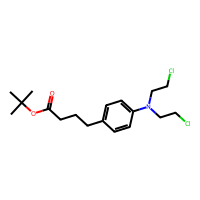
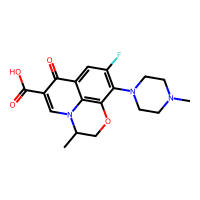
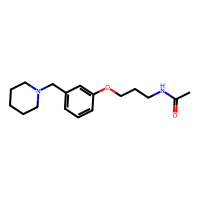
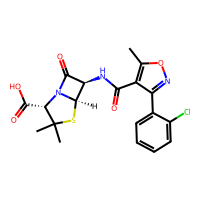
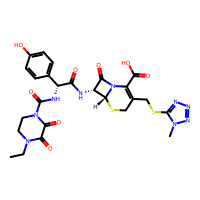
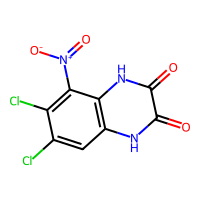
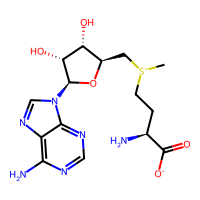
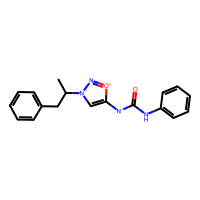
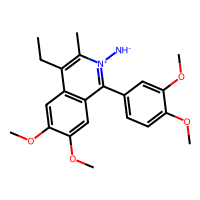
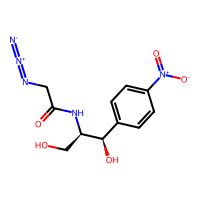

In [166]:
df_bbbp["w"] = 1
df_bbbp

In [167]:
!pip install xlsxwriter
import xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 4.2 MB/s eta 0:00:00


In [168]:
PandasTools.SaveXlsxFromFrame(df_bbbp,'bbbp_curated.xlsx',size=(150,150))
files.download('bbbp_curated.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [171]:
df_removed.to_excel('bbbp_removed.xlsx', index=False)
files.download('bbbp_removed.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>